In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#importing necessary libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
!unzip /content/drive/MyDrive/Datasets/imgs.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/c7/img_566.jpg    
  inflating: train/c7/img_56636.jpg  
  inflating: train/c7/img_56661.jpg  
  inflating: train/c7/img_56699.jpg  
  inflating: train/c7/img_56717.jpg  
  inflating: train/c7/img_56724.jpg  
  inflating: train/c7/img_56768.jpg  
  inflating: train/c7/img_56779.jpg  
  inflating: train/c7/img_56849.jpg  
  inflating: train/c7/img_56899.jpg  
  inflating: train/c7/img_56938.jpg  
  inflating: train/c7/img_5706.jpg   
  inflating: train/c7/img_57076.jpg  
  inflating: train/c7/img_57122.jpg  
  inflating: train/c7/img_57137.jpg  
  inflating: train/c7/img_5715.jpg   
  inflating: train/c7/img_57278.jpg  
  inflating: train/c7/img_57321.jpg  
  inflating: train/c7/img_57345.jpg  
  inflating: train/c7/img_57355.jpg  
  inflating: train/c7/img_5741.jpg   
  inflating: train/c7/img_57433.jpg  
  inflating: train/c7/img_5753.jpg   
  inflating: train/c7/img_57559.jpg  
  inflating: train/c7/img_57594.jpg  

In [36]:
#importing necessary libraries
import os
import numpy as np
import matplotlib.pyplot as plt

In [37]:
import tensorflow as tf
from tensorflow.keras.utils import load_img, img_to_array
import os

# Load training data with subdirectories
train_directory = tf.keras.utils.image_dataset_from_directory(
    "/content/train",
)

print(train_directory)

Found 22424 files belonging to 10 classes.
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


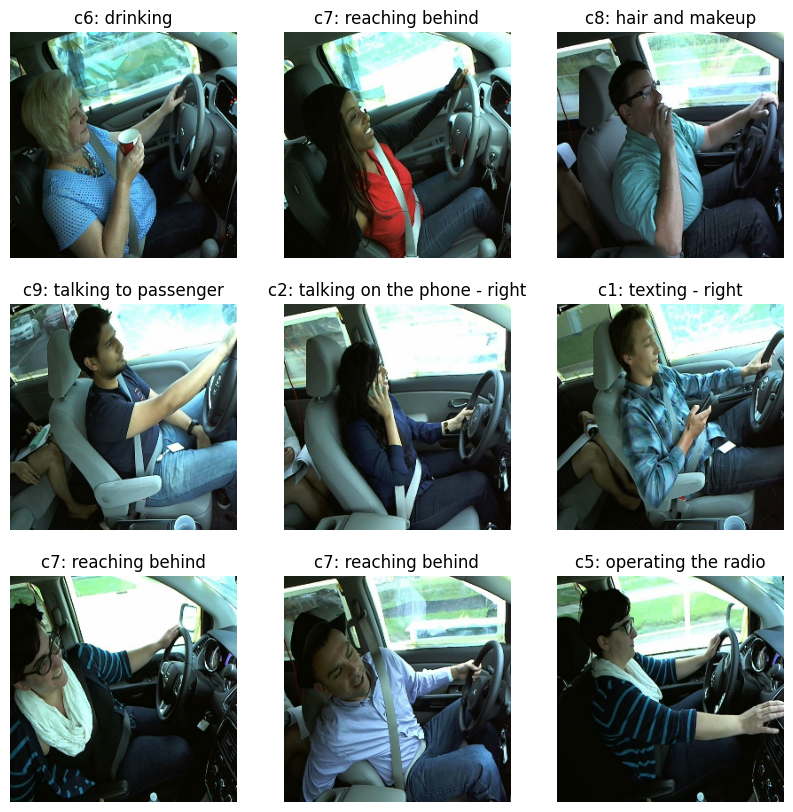

In [38]:
class_names = [
    "c0: safe driving",
    "c1: texting - right",
    "c2: talking on the phone - right",
    "c3: texting - left",
    "c4: talking on the phone - left",
    "c5: operating the radio",
    "c6: drinking",
    "c7: reaching behind",
    "c8: hair and makeup",
    "c9: talking to passenger"
]
plt.figure(figsize=(10,10))
for images, labels in train_directory.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [39]:
BATCH_SIZE = 32
IMG_SHAPE  = 224

In [40]:
# plot images
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [41]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory="/content/train",
                                               shuffle=True,
                                               target_size=(IMG_SHAPE,IMG_SHAPE))

Found 22424 images belonging to 10 classes.


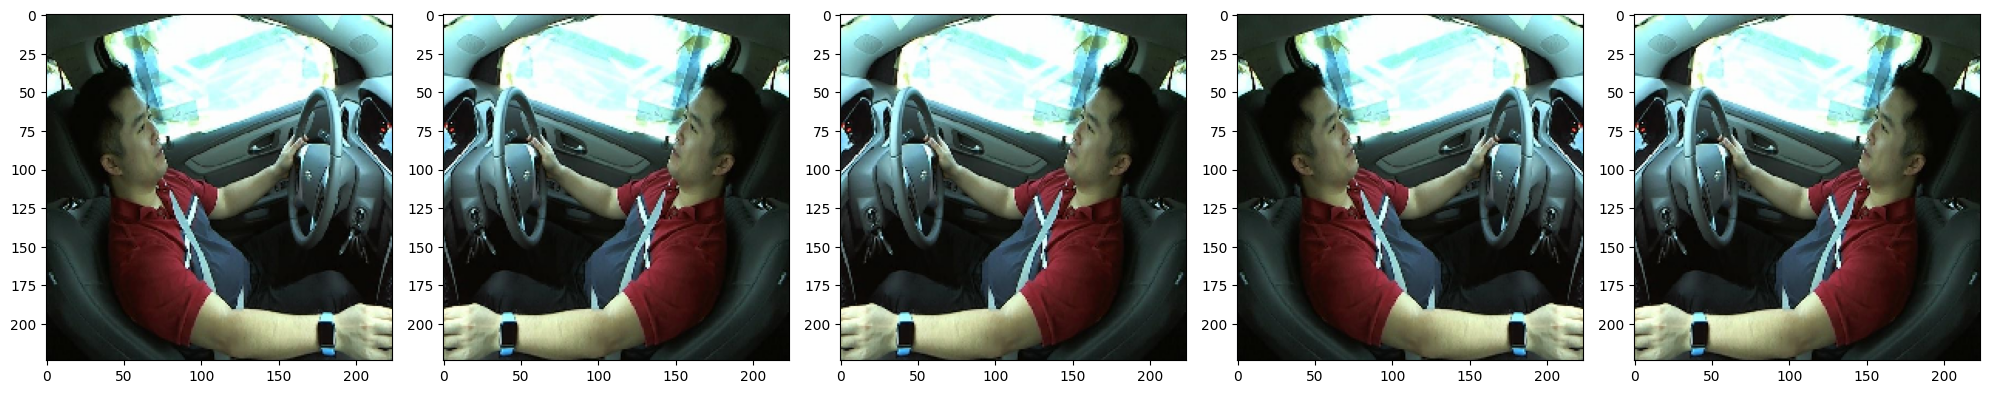

In [42]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

Found 22424 images belonging to 10 classes.


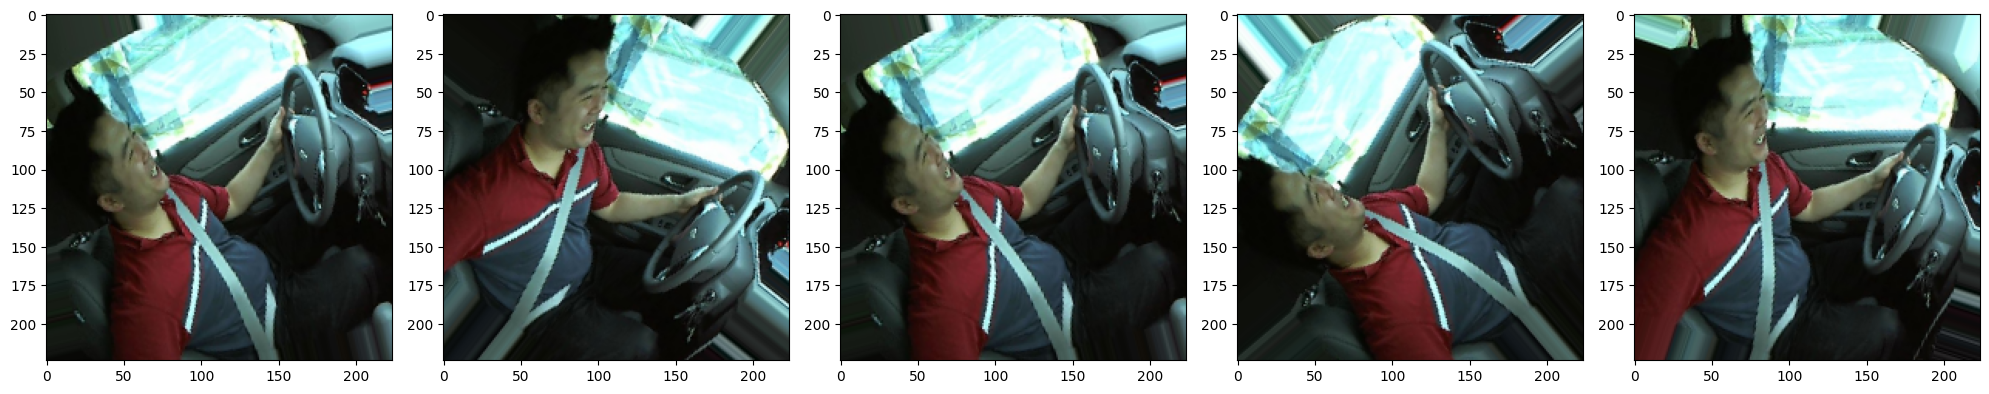

In [43]:
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)

train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory="/content/train",
                                               shuffle=True,
                                               target_size=(IMG_SHAPE, IMG_SHAPE))


augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

Found 22424 images belonging to 10 classes.


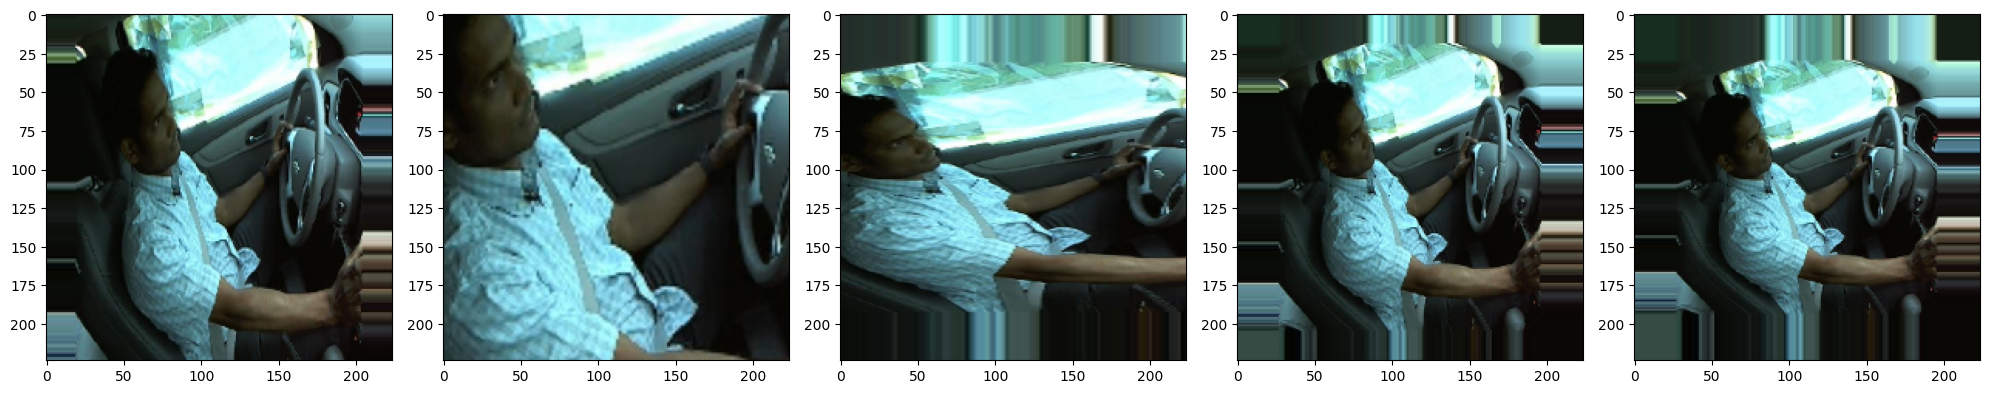

In [44]:
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5)

train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory= "/content/train",
                                               shuffle=True,
                                               target_size=(IMG_SHAPE, IMG_SHAPE))


augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

Found 22424 images belonging to 10 classes.


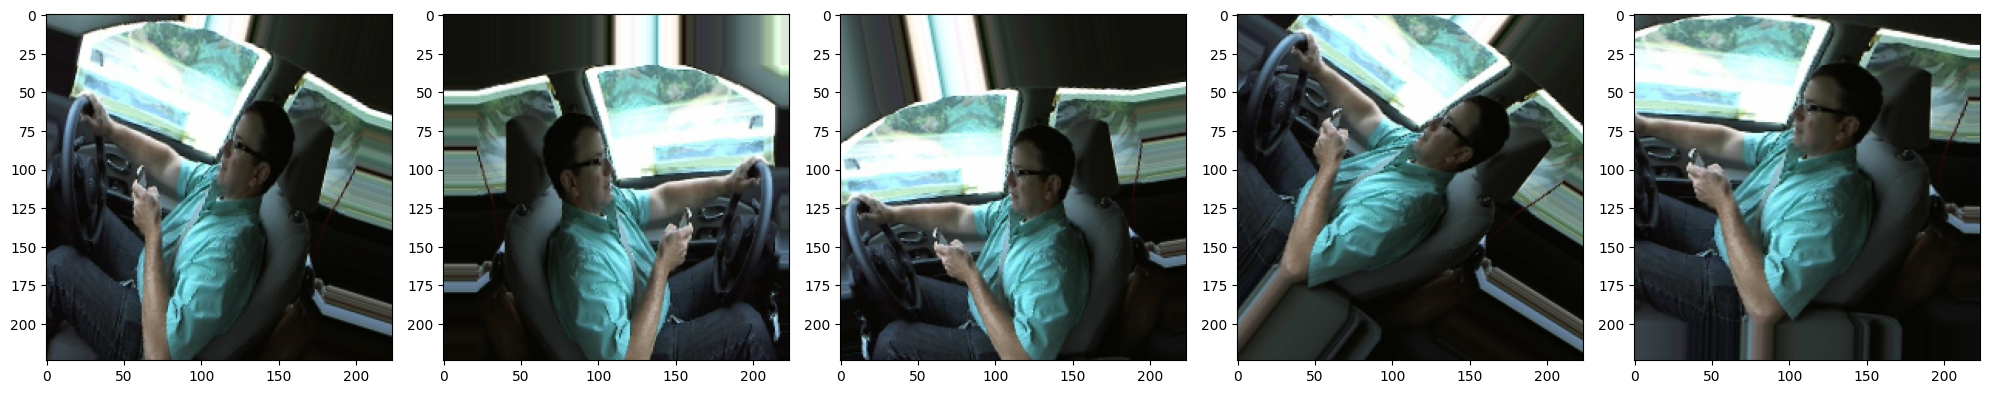

In [45]:
image_gen_train = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_data_gen = image_gen_train.flow_from_directory(batch_size=BATCH_SIZE,
                                                     directory= "/content/train",
                                                     shuffle=True,
                                                     target_size=(IMG_SHAPE,IMG_SHAPE),
                                                     class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [46]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3)
])

In [47]:
IMAGE_SIZE =[224, 224]

In [48]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16

# Initialize VGG16
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# Freeze layers
for layer in vgg.layers:
    layer.trainable = False


In [49]:
from glob import glob

# useful for getting number of classes
folders = glob("/content/train/*")
len(folders)

10

In [50]:
from keras.layers import Input, Lambda, Dense, Flatten

x = Flatten()(vgg.output)
x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [51]:
from keras.models import Model

# create a model object
vggModel = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
vggModel.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1000)                │      25,089,000 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 39,813,698 (151.88 MB)

 Trainable params: 25,099,010 (95.75 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [52]:
from tensorflow.keras.optimizers import Adam
vggModel.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [53]:
vggHistory = vggModel.fit(
    train_data_gen,
    epochs=20,
    steps_per_epoch=len(train_data_gen),
)

Epoch 1/20
701/701 ━━━━━━━━━━━━━━━━━━━━ 427s 575ms/step - accuracy: 0.3530 - loss: 1.9085
Epoch 2/20
701/701 ━━━━━━━━━━━━━━━━━━━━ 0s 26us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/20
701/701 ━━━━━━━━━━━━━━━━━━━━ 364s 512ms/step - accuracy: 0.6789 - loss: 0.9888
Epoch 4/20
701/701 ━━━━━━━━━━━━━━━━━━━━ 0s 12us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/20
701/701 ━━━━━━━━━━━━━━━━━━━━ 422s 594ms/step - accuracy: 0.7608 - loss: 0.7432
Epoch 6/20
701/701 ━━━━━━━━━━━━━━━━━━━━ 0s 19us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/20
701/701 ━━━━━━━━━━━━━━━━━━━━ 481s 680ms/step - accuracy: 0.7898 - loss: 0.6474
Epoch 8/20
701/701 ━━━━━━━━━━━━━━━━━━━━ 0s 14us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/20
701/701 ━━━━━━━━━━━━━━━━━━━━ 496s 671ms/step - accuracy: 0.8117 - loss: 0.5723
Epoch 10/20
701/701 ━━━━━━━━━━━━━━━━━━━━ 0s 12us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 11/20
701/701 ━━━━━━━━━━━━━━━━━━━━ 354s 499ms/step - accuracy: 0.822

In [54]:
vggModel.save('vggModel_driver_behaviour.h5')

In [55]:
!pip install Keras-Preprocessing
from keras.models import load_model
from keras_preprocessing.image import load_img, img_to_array

model1 = load_model('./vggModel_driver_behaviour.h5',compile=False)

In [56]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data_gen_predict = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                  horizontal_flip=True)

training_set = train_data_gen_predict.flow_from_directory("/content/train",
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = "categorical")
lab=training_set.class_indices
lab={k:v for v,k in lab.items()}

Found 22424 images belonging to 10 classes.


In [57]:
def output(location):

  img =load_img(location,target_size=(224,224,3))
  img=img_to_array(img)
  img=img/255
  img=np.expand_dims(img,[0])
  answer=model1.predict(img)
  y_class = answer.argmax(axis=-1)
  y="".join(str(x) for x in y_class)
  y=int(y)
  res=lab[y]
  return res

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


'c0'

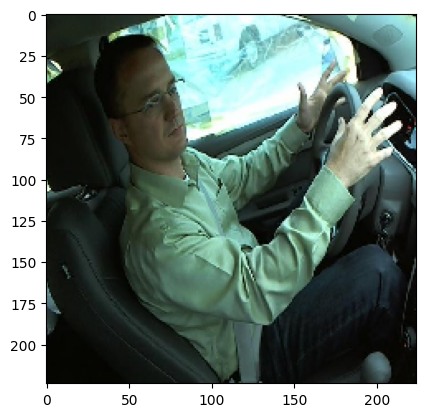

In [61]:
img="/content/train/c0/img_100074.jpg"
pic=load_img("/content/train/c0/img_100074.jpg",target_size=(224,224,3))
plt.imshow(pic)
output(img)